## Fonseca and Fleming function 

Problem taken from \[Fonseca, C. M.; Fleming, P. J. (1995). An Overview of Evolutionary Algorithms in Multiobjective Optimization. Evol Comput. 3 (1): 1–16\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i - \frac{1}{\sqrt{3}} \right)^2 \right]$

$f_2 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i + \frac{1}{\sqrt{3}} \right)^2 \right]$

*in the domain*

$-4 \le x_1,x_2,x_3 \le 4$

In [1]:
from mosa import Anneal
from time import time
from math import exp,sqrt
%matplotlib inline

### Translates the Fonseca and Fleming problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. 

The argument of the Python function is a dictionary with just one key, $X$, representing a trial solution to the problem. 

This is a unconstrained problem, so we do not have to worry about how to deal with constraints.

In [2]:
def fobj(solution):
    g1=0.0
    g2=0.0
    Y=1.0/sqrt(3.0)
    
    for i in range(3):
        g1+=pow((solution["X"][i]-Y),2)
        g2+=pow((solution["X"][i]+Y),2)
        
    f1=1.0-exp(-g1)
    f2=1.0-exp(-g2)
    
    return f1,f2

### Initialization

First, an *Anneal* object is created.

Then, a population is defined. The population is a dictionary and its key $X$ is the same key that will be present in the trial solutions to the problem. 

In the case of the Fonseca and Fleming problem, we used only one key because the variables $x_1$, $x_2$ and $x_3$ are restricted to the same domain. Since the sample space is continuous for $X$ in the domain defined above, a tuple with two values (i.e., the lower and upper bounds) is assigned to $X$.

In [3]:
opt=Anneal()
opt.archive_size=10000
opt.maximum_archive_rejections=10000

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
         Developed by Prof. Roberto Gomes         
   Universidade Federal do ABC (UFABC), Brazil    




In [4]:
opt.population={"X":(-4.0,4.0)}

### Hot run

A first run starting at very high temperatures (1.0) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. 

The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

In [5]:
opt.initial_temperature=1.0
opt.number_of_iterations=1000
opt.number_of_temperatures=100
opt.temperature_decrease_factor=0.95
opt.number_of_solution_elements={"X":3}
opt.mc_step_size={"X":1.0}

In [6]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------
Keys in the population/solution dictionaries:
    ['X']:
        Number of elements in the solution: 3
        Continuous sample space
        Boundaries: (-4.0,4.0)
        Selection weight of this key: 1.000000
        Weight of 'change value' trial move: 1.000000
        Solution sorted after trial move: False
        Maximum step size to choose a new value in the solution: 1.000000
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 995.
    Fraction of accepted moves: 0.995000.
    Number of archive updates: 41.
    Fraction of archive updates in accepted moves: 0.041206.
------
TEMPERATURE: 0.950000
    Number of accepted moves: 994.
    Fraction of accepted moves: 0.994000.

    Number of accepted moves: 472.
    Fraction of accepted moves: 0.472000.
    Number of archive updates: 33.
    Fraction of archive updates in accepted moves: 0.069915.
------
TEMPERATURE: 0.128512
    Number of accepted moves: 591.
    Fraction of accepted moves: 0.591000.
    Number of archive updates: 10.
    Fraction of archive updates in accepted moves: 0.016920.
------
TEMPERATURE: 0.122087
    Number of accepted moves: 438.
    Fraction of accepted moves: 0.438000.
    Number of archive updates: 10.
    Fraction of archive updates in accepted moves: 0.022831.
------
TEMPERATURE: 0.115982
    Number of accepted moves: 375.
    Fraction of accepted moves: 0.375000.
    Number of archive updates: 25.
    Fraction of archive updates in accepted moves: 0.066667.
------
TEMPERATURE: 0.110183
    Number of accepted moves: 355.
    Fraction of accepted moves: 0.355000.
    Number of archive updates: 9.
    Fraction of archive updates in accepted moves: 0.025352.
------
TEMPERATURE: 

------
TEMPERATURE: 0.016515
    Number of accepted moves: 121.
    Fraction of accepted moves: 0.121000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.008264.
------
TEMPERATURE: 0.015690
    Number of accepted moves: 120.
    Fraction of accepted moves: 0.120000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.033333.
------
TEMPERATURE: 0.014905
    Number of accepted moves: 121.
    Fraction of accepted moves: 0.121000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.008264.
------
TEMPERATURE: 0.014160
    Number of accepted moves: 112.
    Fraction of accepted moves: 0.112000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.008929.
------
TEMPERATURE: 0.013452
    Number of accepted moves: 115.
    Fraction of accepted moves: 0.115000.
    Number of archive updates: 5.
    Fraction of archive updates in accepted moves: 0.043

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (0.01) is performed to allow the solutions to relax to the vicinity of the Pareto front.

Solutions produced by the "hot run" were taken from the archive.

In [7]:
opt.initial_temperature=0.01
opt.mc_step_size={"X":0.1}

In [8]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------
Keys in the population/solution dictionaries:
    ['X']:
        Number of elements in the solution: 3
        Continuous sample space
        Boundaries: (-4.0,4.0)
        Selection weight of this key: 1.000000
        Weight of 'change value' trial move: 1.000000
        Solution sorted after trial move: False
        Maximum step size to choose a new value in the solution: 0.100000
------
Initial solution loaded from the checkpoint file...
Done!
------
TEMPERATURE: 0.010000
    Number of accepted moves: 639.
    Fraction of accepted moves: 0.639000.
    Number of archive updates: 23.
    Fraction of archive updates in accepted moves: 0.035994.
------
TEMPERATURE: 0.009500
    Number of accepted moves: 653.
    Fraction of accepted moves: 0.653000.
    Number of archive updates: 22.
    Fraction of archive updates in accepted moves: 0.033691.
------
TEMPERATURE: 0.009025
    Number of a

    Number of accepted moves: 228.
    Fraction of accepted moves: 0.228000.
    Number of archive updates: 8.
    Fraction of archive updates in accepted moves: 0.035088.
------
TEMPERATURE: 0.001353
    Number of accepted moves: 235.
    Fraction of accepted moves: 0.235000.
    Number of archive updates: 14.
    Fraction of archive updates in accepted moves: 0.059574.
------
TEMPERATURE: 0.001285
    Number of accepted moves: 226.
    Fraction of accepted moves: 0.226000.
    Number of archive updates: 3.
    Fraction of archive updates in accepted moves: 0.013274.
------
TEMPERATURE: 0.001221
    Number of accepted moves: 231.
    Fraction of accepted moves: 0.231000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.030303.
------
TEMPERATURE: 0.001160
    Number of accepted moves: 204.
    Fraction of accepted moves: 0.204000.
    Number of archive updates: 13.
    Fraction of archive updates in accepted moves: 0.063725.
------
TEMPERATURE: 0.

    Number of accepted moves: 45.
    Fraction of accepted moves: 0.045000.
    Number of archive updates: 20.
    Fraction of archive updates in accepted moves: 0.444444.
------
TEMPERATURE: 0.000149
    Number of accepted moves: 39.
    Fraction of accepted moves: 0.039000.
    Number of archive updates: 8.
    Fraction of archive updates in accepted moves: 0.205128.
------
TEMPERATURE: 0.000142
    Number of accepted moves: 27.
    Fraction of accepted moves: 0.027000.
    Number of archive updates: 7.
    Fraction of archive updates in accepted moves: 0.259259.
------
TEMPERATURE: 0.000135
    Number of accepted moves: 31.
    Fraction of accepted moves: 0.031000.
    Number of archive updates: 10.
    Fraction of archive updates in accepted moves: 0.322581.
------
TEMPERATURE: 0.000128
    Number of accepted moves: 39.
    Fraction of accepted moves: 0.039000.
    Number of archive updates: 15.
    Fraction of archive updates in accepted moves: 0.384615.
------
TEMPERATURE: 0.0001

### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [9]:
start=time()
pruned=opt.prunedominated()
opt.printx(pruned)
end=time()
print("   Elapsed time: %f s" % (end-start))

===
Solutions:
1) {'X': [-0.3710300691022852, -0.23504703161032037, -0.3237115633959706]}
2) {'X': [0.2571054785075193, 0.15788988370520984, 0.1860077874431063]}
3) {'X': [-0.05277546864875671, 0.045887331889252314, -0.07452465460826851]}
4) {'X': [-0.5137503596004844, -0.5008961712122604, -0.5116343021957295]}
5) {'X': [-0.05309716003900733, -0.22429306436763063, -0.05395815542913285]}
6) {'X': [0.06914514665424587, -0.08845456277051245, 0.044125883640983465]}
7) {'X': [0.06914514665424587, -0.10724132463323044, -0.09474392905069418]}
8) {'X': [0.26760608685920295, 0.32186325190122256, 0.2189563443304101]}
9) {'X': [0.26760608685920295, 0.23951828538460118, 0.2189563443304101]}
10) {'X': [0.26760608685920295, 0.2500643238755611, 0.2189563443304101]}
11) {'X': [-0.29989011373572083, -0.20715471228909532, -0.25746593507986293]}
12) {'X': [-0.04247510373677721, 0.02332869364861212, -0.09430110610903575]}
13) {'X': [-0.06848428410999974, 0.0036862588139905395, -0.16431430884598974]}
14) {

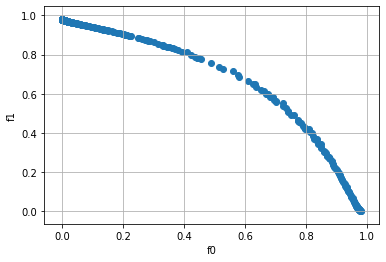

In [10]:
opt.plotfront(pruned)